In [1]:
from PIL import Image, ImageEnhance
import os
import random
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


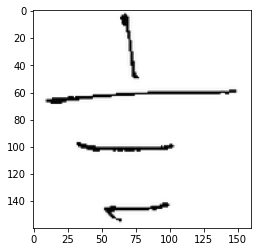

In [ ]:
imshow(image.resize((160,160),Image.ANTIALIAS))

# Binary image random pixel removal

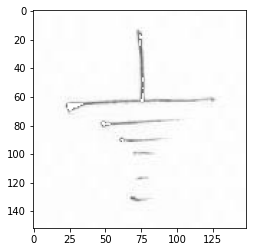

In [ ]:
image_file = Image.open("D:/RESEARCH/Circuit component recognition/train/6/componentl016.bmp")

def binary_augment(image_file):
    image_file = image_file.convert('L') # binary
    image_file = image_file.point(lambda p: 255 if p < random.randint(100,110) else p)
    image_file = image_file.convert('RGB') # mono
    return image_file

image = binary_augment(image_file)
# image.save("trial.bmp")
imshow(binary_augment(image_file))

# Brightness

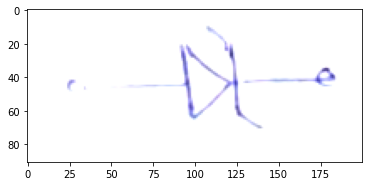

In [ ]:
image_file = Image.open("/content/drive/MyDrive/data/train/5/componentl001.bmp")
def brightness(image_file):
    image_file = ImageEnhance.Brightness(image_file)
    return image_file.enhance(1.5)

imshow((brightness(image_file)))

# Random rotation (-20 to -10) or (10 to 20)

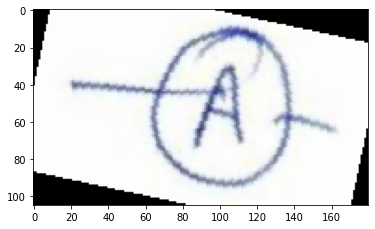

In [6]:
img = Image.open("/content/drive/MyDrive/data/train/2/componentl001.bmp")
def rotator(img):  
  decider = random.randint(1,2)
  if decider == 1:
    img = img.rotate(random.randint(10,20))
  else:
    img = img.rotate(random.randint(-20,-10)) 
  return img 

imshow(rotator(img)) 

# Contrast

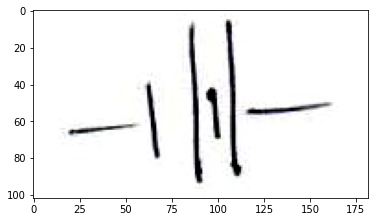

In [ ]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("/content/drive/MyDrive/data/train/5/componentl001.bmp")
def contraster(im):
  #image brightness enhancer
  enhancer = ImageEnhance.Contrast(im)
  return enhancer.enhance(1.75)

imshow(contraster(im))  

# Dilation based thickening

In [14]:
import cv2
img = cv2.imread("/content/drive/MyDrive/data/train/1/componentl046.bmp", cv2.IMREAD_GRAYSCALE)
def dilation_thick(img):
  (thresh, img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  print(img.shape[0])
  kernel = np.ones((3, 3), np.uint8)
  img_dilation = cv2.dilate(img, kernel, iterations=1)
  for i in range(img.shape[0]): # height
    for j in range(img.shape[1]): # width
      if (img[i][j] == img_dilation[i][j]):
        continue
      else:
        try:
          img[i][j] == (img[i-1][j]+img[i-1][j-1]+img[i-1][j+1]+img[i+1][j]+img[i+1][j-1]+img[i+1][j+1]+img[i][j-1]+img[i][j+1])/8
        except:
          img[i][j] == 0  
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  return img

cv2.imwrite("image.png",dilation_thick(img))
#imshow(img_dilation)

141


<ipython-input-14-614e3acb9429>:14: RuntimeWarning: overflow encountered in ubyte_scalars
  img[i][j] == (img[i-1][j]+img[i-1][j-1]+img[i-1][j+1]+img[i+1][j]+img[i+1][j-1]+img[i+1][j+1]+img[i][j-1]+img[i][j+1])/8


True

# Saving the augmented images

In [15]:
for i in range(1,21):
  folder = "/content/drive/MyDrive/data/train/"+str(i)+"/"
  for image in os.listdir(os.path.join(folder)):
      #print(image[13:17])
      if image[13:17] == ".bmp":
          print(os.path.join(folder,image))
          img = Image.open(os.path.join(folder,image))
          img_cv = cv2.imread(os.path.join(folder,image), cv2.IMREAD_GRAYSCALE)
          # rotated_pos = img.rotate(random.randint(1,10)) # random positive angle rotation
          # rotated_neg = img.rotate(random.randint(-10,-1)) # random negative angle rotation
          # bin_img = binary_augment(img)
          # bright_img = brightness(img)
          # contrast_img = contraster(img)
          # rot_img = rotator(img)
          dilation_img = dilation_thick(img_cv)
    
#         rotated_pos.save(folder+image[0:13]+"rotpos"+".bmp")
#         rotated_neg.save(folder+image[0:13]+"rotneg"+".bmp")
#         bin_img.save(folder+image[0:13]+"binfil"+".bmp")
#         bright_img.save(folder+image[0:13]+"bright"+".bmp")
#         contrast_img.save(folder+image[0:13]+"contrast"+".bmp")
#         rot_img.save(folder+image[0:13]+"arbirot"+".bmp")
          cv2.imwrite(folder+image[0:13]+"dilated"+".bmp",dilation_img)

/content/drive/MyDrive/data/train/1/componentl032.bmp
112
/content/drive/MyDrive/data/train/1/componentl035.bmp
124
/content/drive/MyDrive/data/train/1/componentl046.bmp
141
/content/drive/MyDrive/data/train/1/componentl047.bmp
93


<ipython-input-14-614e3acb9429>:14: RuntimeWarning: overflow encountered in ubyte_scalars
  img[i][j] == (img[i-1][j]+img[i-1][j-1]+img[i-1][j+1]+img[i+1][j]+img[i+1][j-1]+img[i+1][j+1]+img[i][j-1]+img[i][j+1])/8


/content/drive/MyDrive/data/train/1/componentl043.bmp
127
/content/drive/MyDrive/data/train/1/componentl050.bmp
103
/content/drive/MyDrive/data/train/1/componentl029.bmp
111
/content/drive/MyDrive/data/train/1/componentl048.bmp
97
/content/drive/MyDrive/data/train/1/componentl042.bmp
138
/content/drive/MyDrive/data/train/1/componentl044.bmp
96
/content/drive/MyDrive/data/train/1/componentl040.bmp
86
/content/drive/MyDrive/data/train/1/componentl049.bmp
96
/content/drive/MyDrive/data/train/1/componentl033.bmp
126
/content/drive/MyDrive/data/train/1/componentl039.bmp
93
/content/drive/MyDrive/data/train/1/componentl024.bmp
102
/content/drive/MyDrive/data/train/1/componentl012.bmp
105
/content/drive/MyDrive/data/train/1/componentl015.bmp
93
/content/drive/MyDrive/data/train/1/componentl006.bmp
113
/content/drive/MyDrive/data/train/1/componentl028.bmp
115
/content/drive/MyDrive/data/train/1/componentl036.bmp
89
/content/drive/MyDrive/data/train/1/componentl014.bmp
110
/content/drive/MyDriv

In [8]:
import cv2
for i in range(1,21):
  folder = "/content/drive/MyDrive/data/train/"+str(i)+"/"

  for z in range(10,51):
      img = cv2.imread(folder+"componentl0"+str(z)+"arbirot.bmp")
      print(folder+"componentl0"+str(z)+"arbirot.bmp")
      height, width, _ = img.shape
      for i in range(height):
          for j in range(width):
              # img[i, j] is the RGB pixel at position (i, j)
              # check if it's [0, 0, 0] and replace with [255, 255, 255] if so
              if img[i, j].sum() == 0:
                  img[i, j] = [255, 255, 255]
      cv2.imwrite(folder+"componentl0"+str(z)+"arbirot.bmp",img)   
      
  for z in range(1,10):
      img = cv2.imread(folder+"componentl00"+str(z)+"arbirot.bmp")
      height, width, _ = img.shape
      for i in range(height):
          for j in range(width):
              # img[i, j] is the RGB pixel at position (i, j)
              # check if it's [0, 0, 0] and replace with [255, 255, 255] if so
              if img[i, j].sum() == 0:
                  img[i, j] = [255, 255, 255]
      cv2.imwrite(folder+"componentl00"+str(z)+"arbirot.bmp",img)                      

/content/drive/MyDrive/data/train/1/componentl010arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl011arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl012arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl013arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl014arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl015arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl016arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl017arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl018arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl019arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl020arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl021arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl022arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl023arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl024arbirot.bmp
/content/drive/MyDrive/data/train/1/componentl025arbirot.bmp
/content/drive/MyDrive/d